In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
# importing data file
adult_dataset = pd.read_excel('adult.xlsx')

In [4]:
# first 5 rows of the dataframe
adult_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# last 5 rows of the dataframe
adult_dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# number of rows and columns
adult_dataset.shape

(32561, 15)

In [7]:
# getting some information about the dataset
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
adult_dataset[adult_dataset == '?'] = np.nan

In [9]:
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
# categorial features :
# workclass
# education
# marital-status
# occupation
# relationship 
# race 
# sex
# native-country 

In [11]:
for col in ['workclass', 'occupation', 'native-country']:
    adult_dataset[col].fillna(adult_dataset[col].mode()[0], inplace = True)

In [12]:
adult_dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [13]:
adult_dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Figure size 432x432 with 0 Axes>

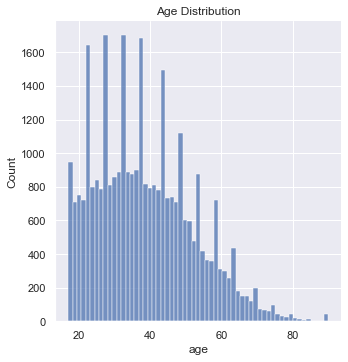

In [14]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(adult_dataset['age'])
plt.title('Age Distribution')
plt.show()

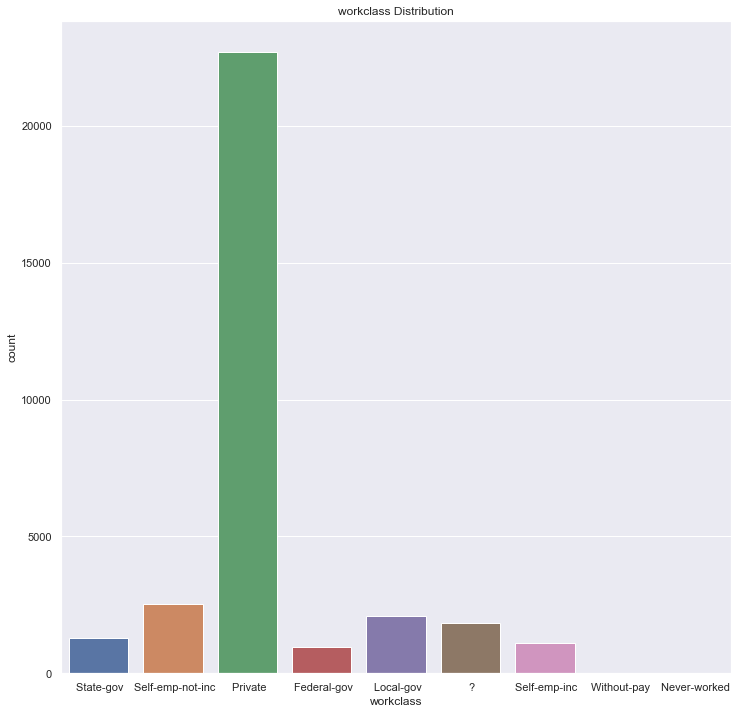

In [15]:
# distribution of workclass value
plt.figure(figsize=(12,12))
sns.countplot(x='workclass', data=adult_dataset)
plt.title('workclass Distribution')
plt.show()

In [16]:
adult_dataset['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

<Figure size 432x432 with 0 Axes>

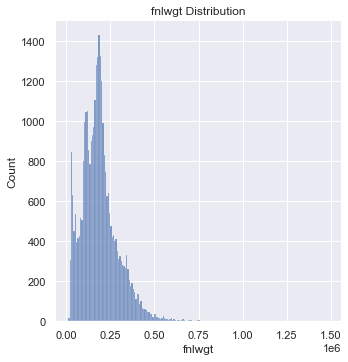

In [17]:
# fnlwgt column
sns.set()
plt.figure(figsize=(6,6))
sns.displot(adult_dataset['fnlwgt'])
plt.title('fnlwgt Distribution')
plt.show()

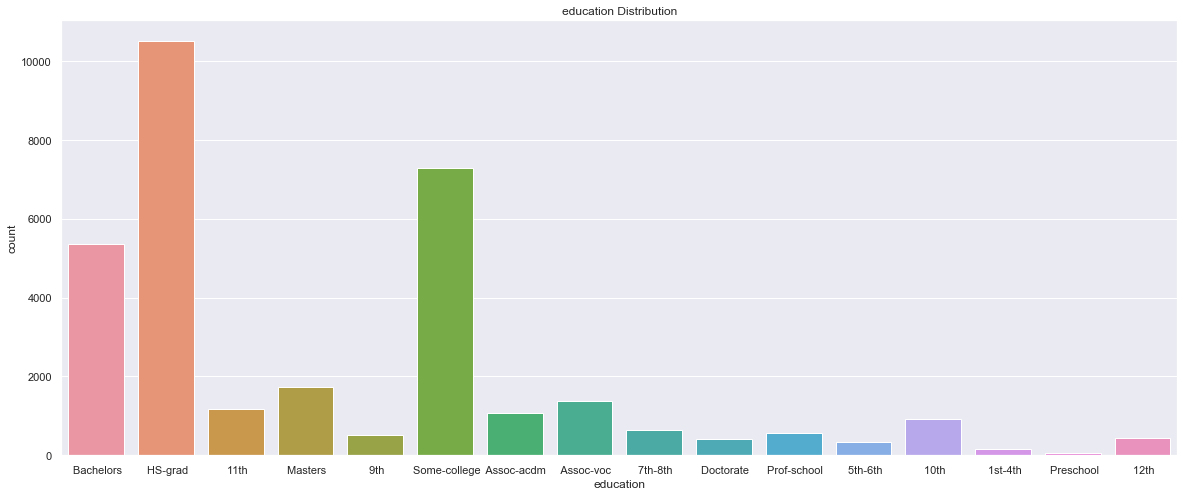

In [18]:
# education column
plt.figure(figsize=(20,8))
sns.countplot(x='education', data=adult_dataset)
plt.title('education Distribution')
plt.show()

In [19]:
adult_dataset['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

<Figure size 720x720 with 0 Axes>

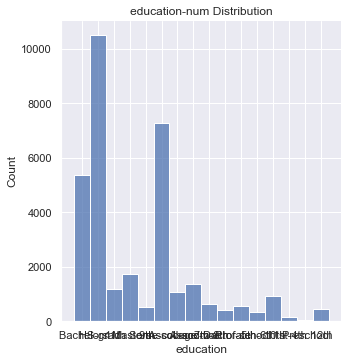

In [20]:
# education-num column
sns.set()
plt.figure(figsize=(10,10))
sns.displot(adult_dataset['education'])
plt.title('education-num Distribution')
plt.show()

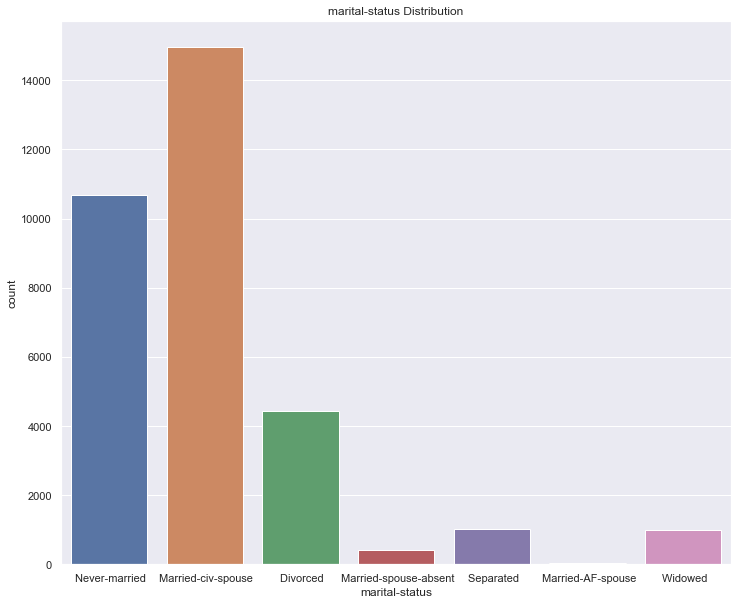

In [21]:
# marital-status column
plt.figure(figsize=(12,10))
sns.countplot(x='marital-status', data=adult_dataset)
plt.title('marital-status Distribution')
plt.show()

In [22]:
adult_dataset['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

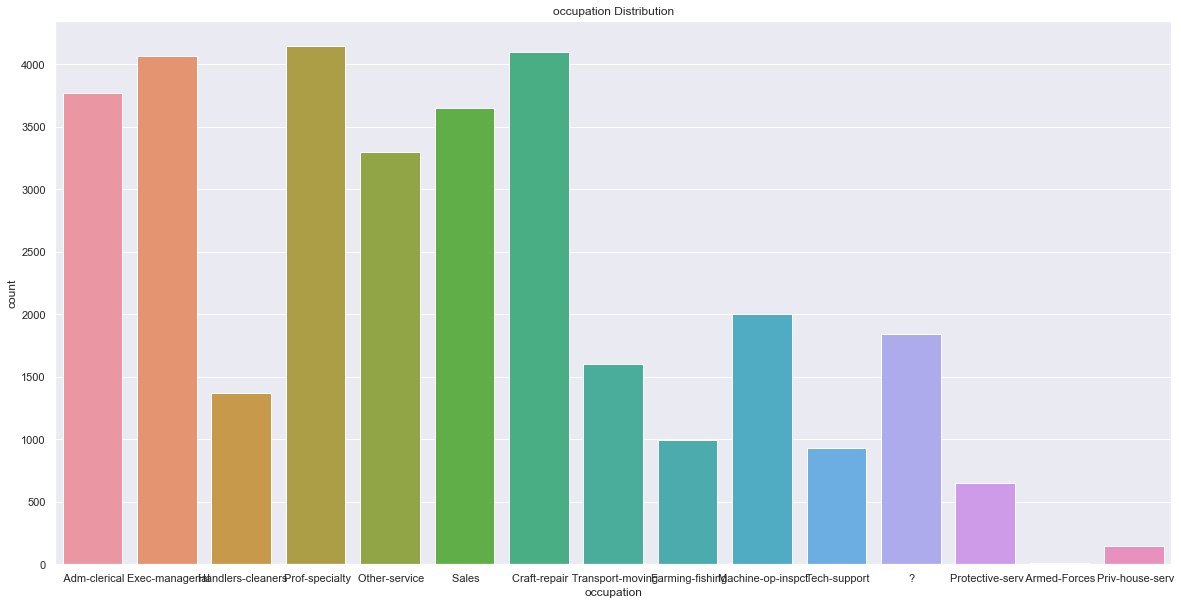

In [23]:
# occupation column
plt.figure(figsize=(20,10))
sns.countplot(x='occupation', data=adult_dataset)
plt.title('occupation Distribution')
plt.show()

In [24]:
adult_dataset['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

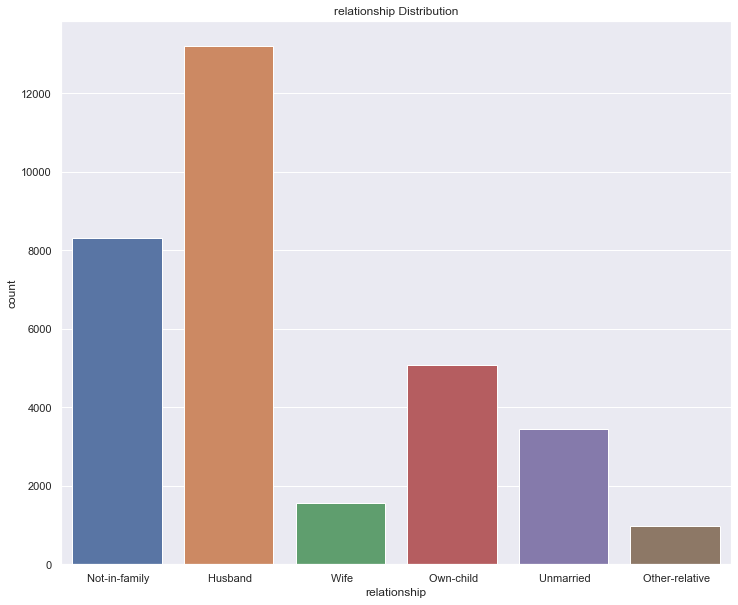

In [25]:
# relationship column
plt.figure(figsize=(12,10))
sns.countplot(x='relationship', data=adult_dataset)
plt.title('relationship Distribution')
plt.show()

In [26]:
adult_dataset['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

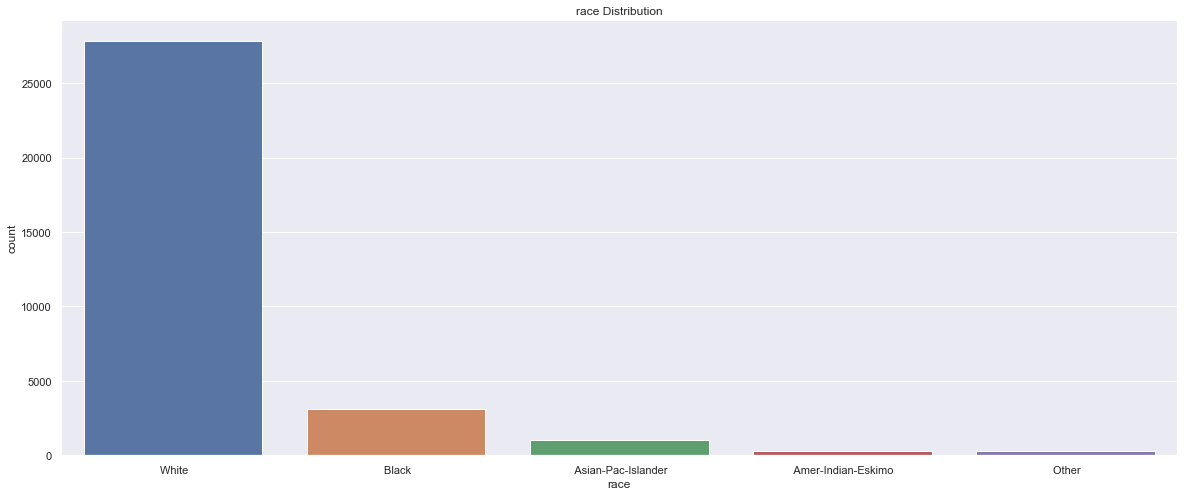

In [27]:
# race column
plt.figure(figsize=(20,8))
sns.countplot(x='race', data=adult_dataset)
plt.title('race Distribution')
plt.show()

In [28]:
adult_dataset['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

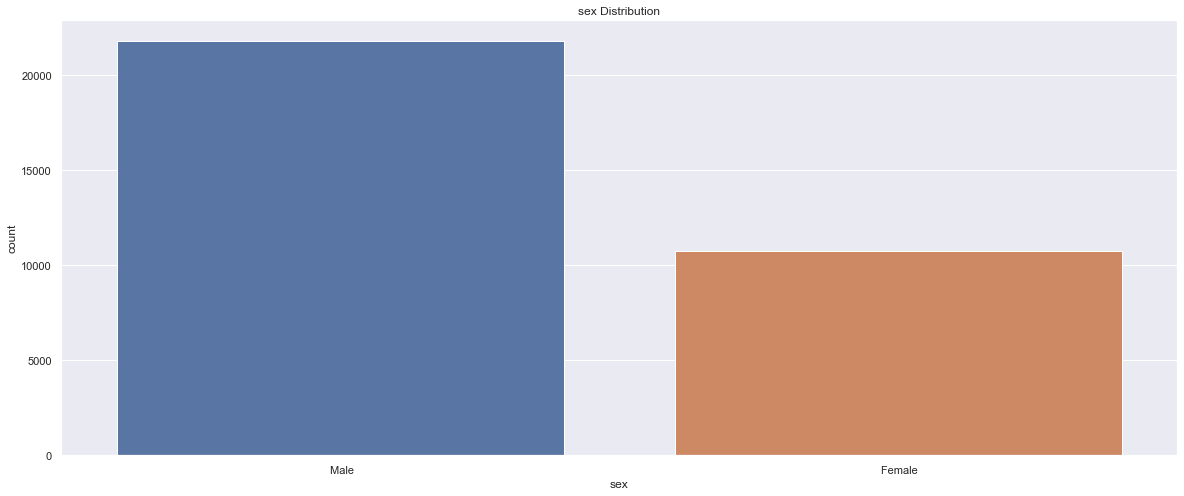

In [29]:
# sex column
plt.figure(figsize=(20,8))
sns.countplot(x='sex', data=adult_dataset)
plt.title('sex Distribution')
plt.show()

In [30]:
adult_dataset['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

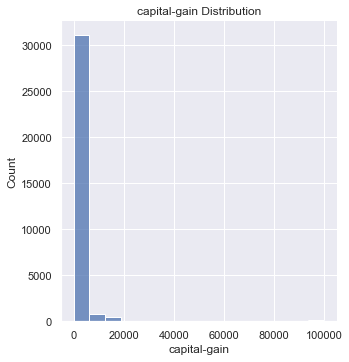

In [31]:
# capital-gain column
sns.set()
plt.figure(figsize=(6,6))
sns.displot(adult_dataset['capital-gain'])
plt.title('capital-gain Distribution')
plt.show()

<Figure size 432x432 with 0 Axes>

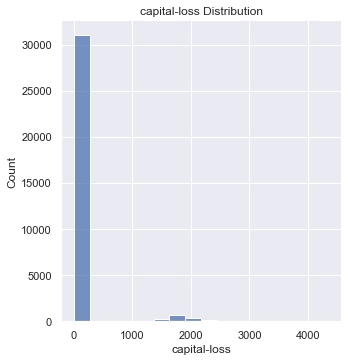

In [32]:
# capital-loss column
sns.set()
plt.figure(figsize=(6,6))
sns.displot(adult_dataset['capital-loss'])
plt.title('capital-loss Distribution')
plt.show()

<Figure size 432x432 with 0 Axes>

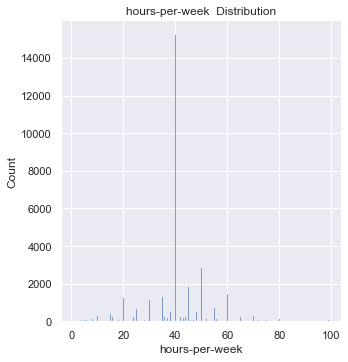

In [33]:
# hours-per-week column
sns.set()
plt.figure(figsize=(6,6))
sns.displot(adult_dataset['hours-per-week'])
plt.title('hours-per-week  Distribution')
plt.show()

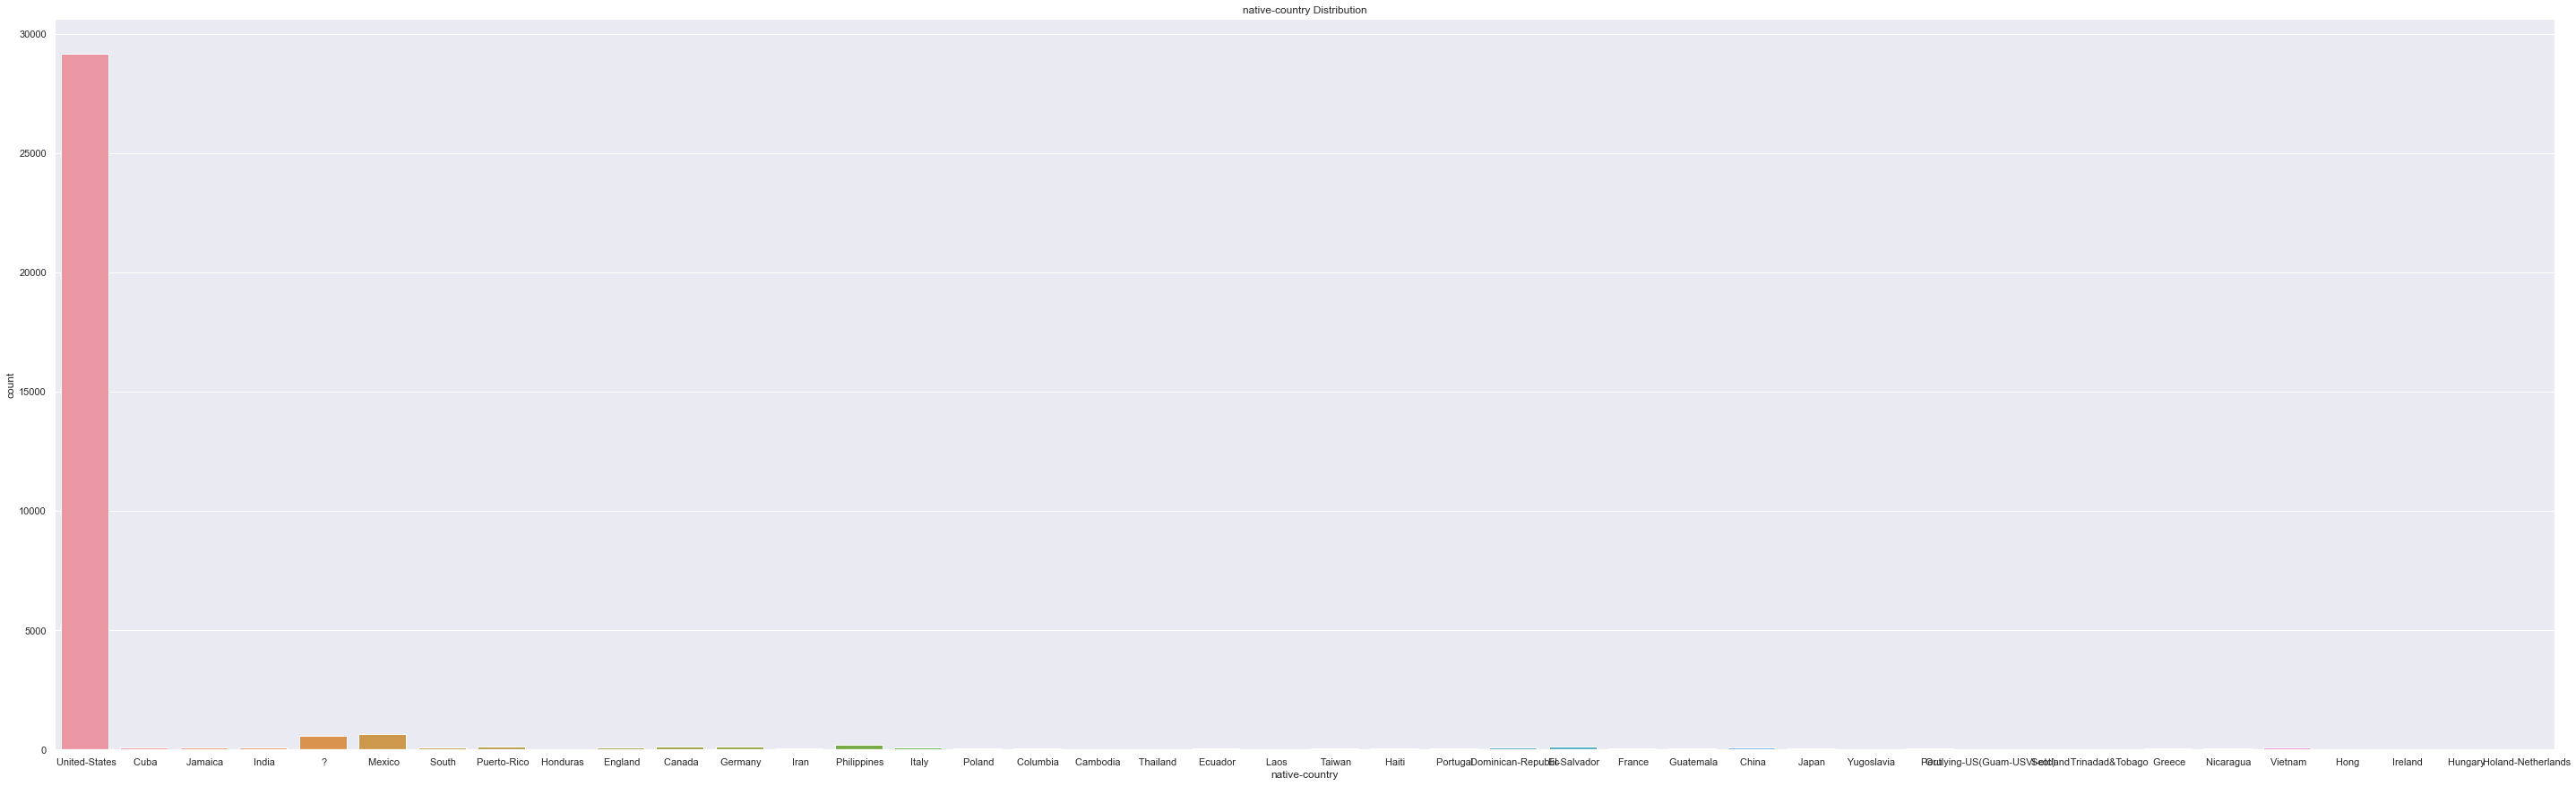

In [34]:
# native-country column
plt.figure(figsize=(50,15))
sns.countplot(x='native-country', data=adult_dataset)
plt.title('native-country Distribution')
plt.show()

In [35]:
adult_dataset['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

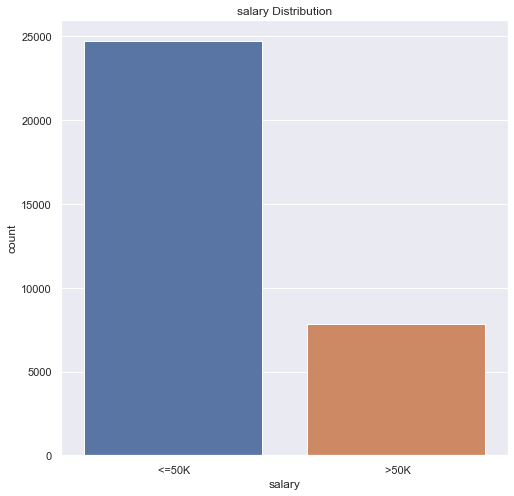

In [36]:
# salary column
plt.figure(figsize=(8,8))
sns.countplot(x='salary', data=adult_dataset)
plt.title('salary Distribution')
plt.show()

In [37]:
adult_dataset['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

 <=50K    75.919044
 >50K     24.080956
Name: salary, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


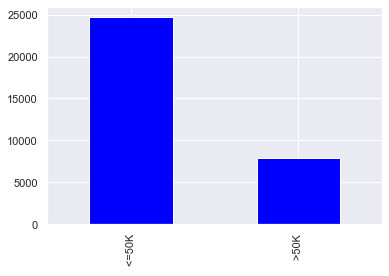

In [38]:
adult_dataset1 = adult_dataset["salary"].value_counts(normalize = True)
print(adult_dataset1*100)

adult_dataset2 = adult_dataset["salary"].value_counts().plot(kind = 'bar',color = 'blue')
print(adult_dataset2)

In [39]:
X= adult_dataset.drop(['salary'], axis =1)

y = adult_dataset['salary']

In [40]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(32561, 14) (22792, 14) (9769, 14)


In [43]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [45]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.470399,0.091645,-0.174981,0.179166,-0.414963,-0.409687,-0.842289,-0.898445,0.396164,0.701715,0.826332,-0.216969,1.589744,0.290103
1,0.617346,2.157698,-0.763517,0.179166,-0.414963,-1.738219,-1.315337,1.591127,0.396164,-1.425079,0.098582,-0.216969,-0.200583,0.290103
2,0.690820,0.091645,-0.017034,1.216323,-0.025832,-0.409687,1.286425,-0.898445,0.396164,0.701715,-0.145156,-0.216969,0.775959,0.290103
3,-0.705178,0.091645,-0.415016,0.179166,-0.414963,0.918845,-0.842289,-0.276052,0.396164,0.701715,-0.145156,-0.216969,-0.037826,-3.019607
4,-1.146019,0.091645,0.130127,-1.376570,-2.360620,0.918845,-0.842289,-0.276052,0.396164,0.701715,-0.145156,-0.216969,-1.258503,-3.274200


In [58]:
X_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
22278,27,4,177119,15,10,0,1,4,4,0,0,0,44,39
8950,27,4,216481,9,13,4,10,1,4,0,0,0,40,39
7838,25,4,256263,7,12,2,12,0,4,1,0,0,40,39
16505,46,4,147640,4,3,2,14,0,0,1,0,1902,40,39
19140,45,4,172822,1,7,0,14,1,4,1,0,2824,76,39


In [47]:
# importing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8243


In [48]:
logreg.score(X_train, y_train)

0.8254650754650754

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.15137789, 0.10132414, 0.09018418, 0.08033985, 0.07634725,
       0.07346994, 0.06842334, 0.06670529, 0.06080487, 0.05970004,
       0.05360566, 0.04862576, 0.04175882, 0.02733296])

In [50]:
X = adult_dataset.drop(['salary'], axis = 1)
y = adult_dataset['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
 
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])
        
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is', dim)

The number of dimensions required to preserve 90% of variance is 12


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6960,  447],
       [1269, 1093]], dtype=int64)

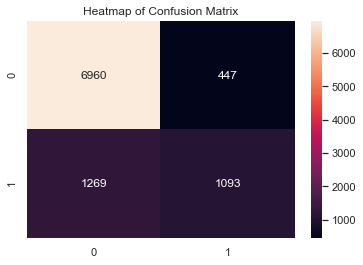

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True , fmt = "d")
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7407
        >50K       0.71      0.46      0.56      2362

    accuracy                           0.82      9769
   macro avg       0.78      0.70      0.73      9769
weighted avg       0.81      0.82      0.81      9769

